In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from pandas.plotting import scatter_matrix

# Takeaway: Successfully loaded the hand gesture dataset and mapped numeric labels (0–24) to corresponding ISL letters (A–Y).

In [3]:
# 1. Load Data from pickle file
with open('data.pickle', 'rb') as f:
    data_dict = pickle.load(f)

# Extract data and labels
data = np.array(data_dict['data'])
labels = np.array(data_dict['labels'])

# Takeaway: Split data into training and testing sets. Trained Random Forest classifier to evaluate gesture prediction performance.

In [5]:




# 2. Label Mapping - Mapping numerical labels to gestures (A-Y)
label_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
              10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
              19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'}

# Takeaway: The confusion matrix highlights which gestures are commonly misclassified. Diagonal dominance indicates high accuracy for many gestures.

In [7]:
# 3. Convert data into DataFrame and encode labels
df = pd.DataFrame(data)
df['label'] = labels


# Takeaway: The classification report shows precision, recall, and F1-score for each gesture, helping identify underperforming classes.

In [9]:
# 4. Encode labels numerically for model training
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Takeaway: Displays gesture-wise accuracy. Helps spot which gestures are well-learned by the model and which need more training data or clearer features.

In [11]:
# 5. Split data into training and test sets
X = df.drop(columns=['label', 'label_encoded'])  # Features (hand landmarks)
y = df['label_encoded']  # Encoded labels

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Takeaway: Shows correlations between different hand landmark features. Strong correlations may suggest redundant features; weak correlations indicate independence.

In [13]:
# 6. Train RandomForest model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

# Takeaway: Visualizes the spread and concentration of a single feature across different gestures.

In [15]:

# 7. Make predictions on the test set
y_pred = clf.predict(X_test)

# Takeaway: Scatter plot shows relationship between two features. Cluster separations indicate that combinations of features help distinguish gestures.

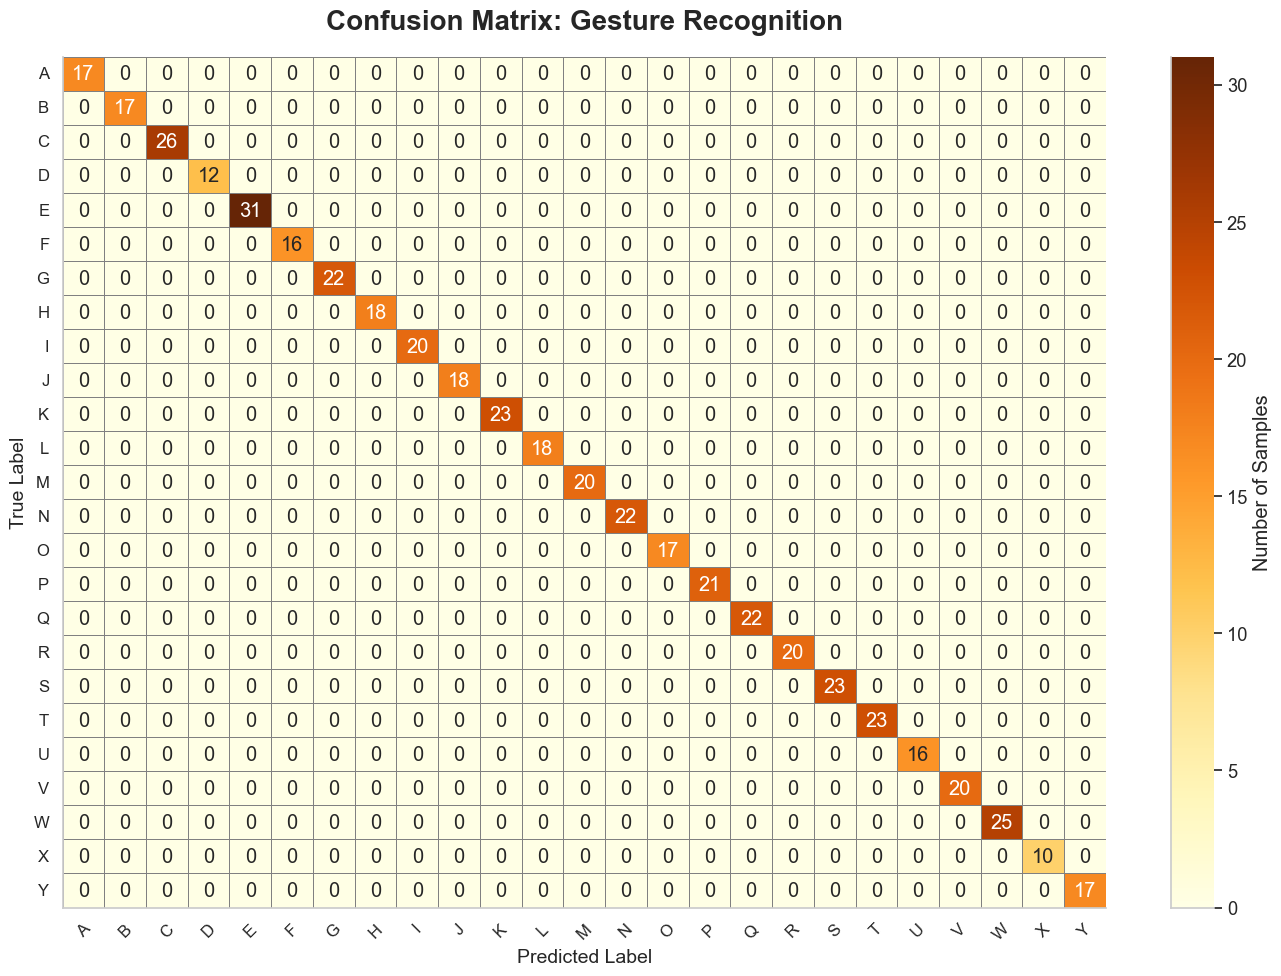

In [17]:
# 8. Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 10))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='YlOrBr',
    linewidths=0.5,
    linecolor='gray',
    xticklabels=[label_dict[i] for i in range(25)],
    yticklabels=[label_dict[i] for i in range(25)],
    cbar_kws={"label": "Number of Samples"}
)

plt.title('Confusion Matrix: Gesture Recognition', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

ax.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
sns.despine()
plt.show()

# Takeaway: Offers detailed distribution insight of a feature for each class. Overlaps show classes that are difficult to separate based on that feature.

In [19]:
# 9. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[label_dict[i] for i in range(25)]))


Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        17
           B       1.00      1.00      1.00        17
           C       1.00      1.00      1.00        26
           D       1.00      1.00      1.00        12
           E       1.00      1.00      1.00        31
           F       1.00      1.00      1.00        16
           G       1.00      1.00      1.00        22
           H       1.00      1.00      1.00        18
           I       1.00      1.00      1.00        20
           J       1.00      1.00      1.00        18
           K       1.00      1.00      1.00        23
           L       1.00      1.00      1.00        18
           M       1.00      1.00      1.00        20
           N       1.00      1.00      1.00        22
           O       1.00      1.00      1.00        17
           P       1.00      1.00      1.00        21
           Q       1.00      1.00      1.00        22
    

# Takeaway: PCA reduces high-dimensional data to 2D. Clusters in the PCA space reflect separability of gestures and overall model feasibility.

In [21]:
# 10. Class-wise Accuracy (Gesture Recognition Efficiency)
class_accuracy = pd.DataFrame({
    'Gesture': [label_dict[i] for i in range(25)],  # Map the index to gesture labels
    'Accuracy': [np.sum((y_pred == i) & (y_test == i)) / np.sum(y_test == i) for i in range(25)]
})
class_accuracy = class_accuracy.sort_values(by='Accuracy', ascending=False)
print("\nClass-wise Accuracy:")
print(class_accuracy)


Class-wise Accuracy:
   Gesture  Accuracy
0        A       1.0
13       N       1.0
23       X       1.0
22       W       1.0
21       V       1.0
20       U       1.0
19       T       1.0
18       S       1.0
17       R       1.0
16       Q       1.0
15       P       1.0
14       O       1.0
12       M       1.0
1        B       1.0
11       L       1.0
10       K       1.0
9        J       1.0
8        I       1.0
7        H       1.0
6        G       1.0
5        F       1.0
4        E       1.0
3        D       1.0
2        C       1.0
24       Y       1.0


# Takeaway: This count plot shows the number of samples for each hand gesture label (A–Y), helping us understand how balanced or imbalanced the dataset is.

C:\Users\aryab\AppData\Local\Temp\ipykernel_46088\2228822808.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, order=sorted(df['label'].unique()), palette=palette)


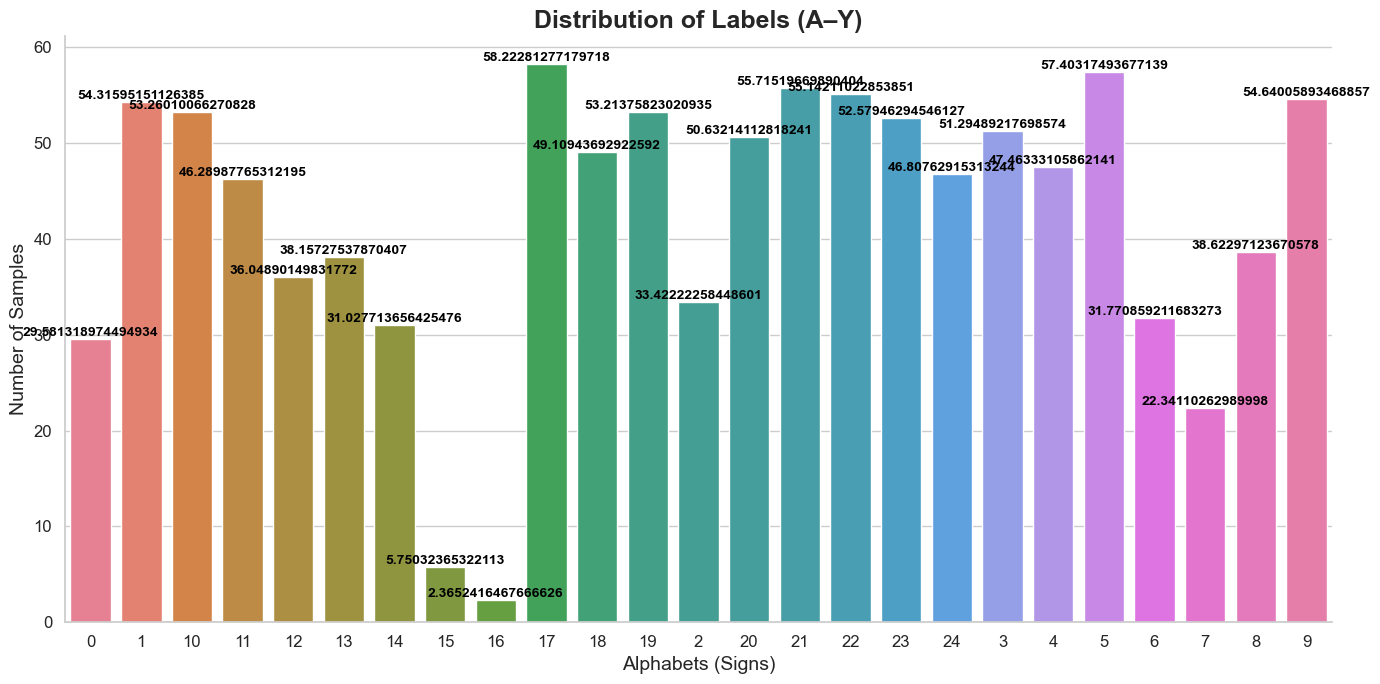

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
palette = sns.color_palette("husl", len(df['label'].unique()))

plt.figure(figsize=(14, 7))
ax = sns.countplot(x='label', data=df, order=sorted(df['label'].unique()), palette=palette)

plt.title('Distribution of Labels (A–Y)', fontsize=18, fontweight='bold')
plt.xlabel('Alphabets (Signs)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

ax.tick_params(labelsize=12)
sns.despine()
plt.tight_layout()
plt.show()

# Takeaway: This pair plot (using the first 5 features) helps you explore the relationships between different feature pairs for each hand gesture label.

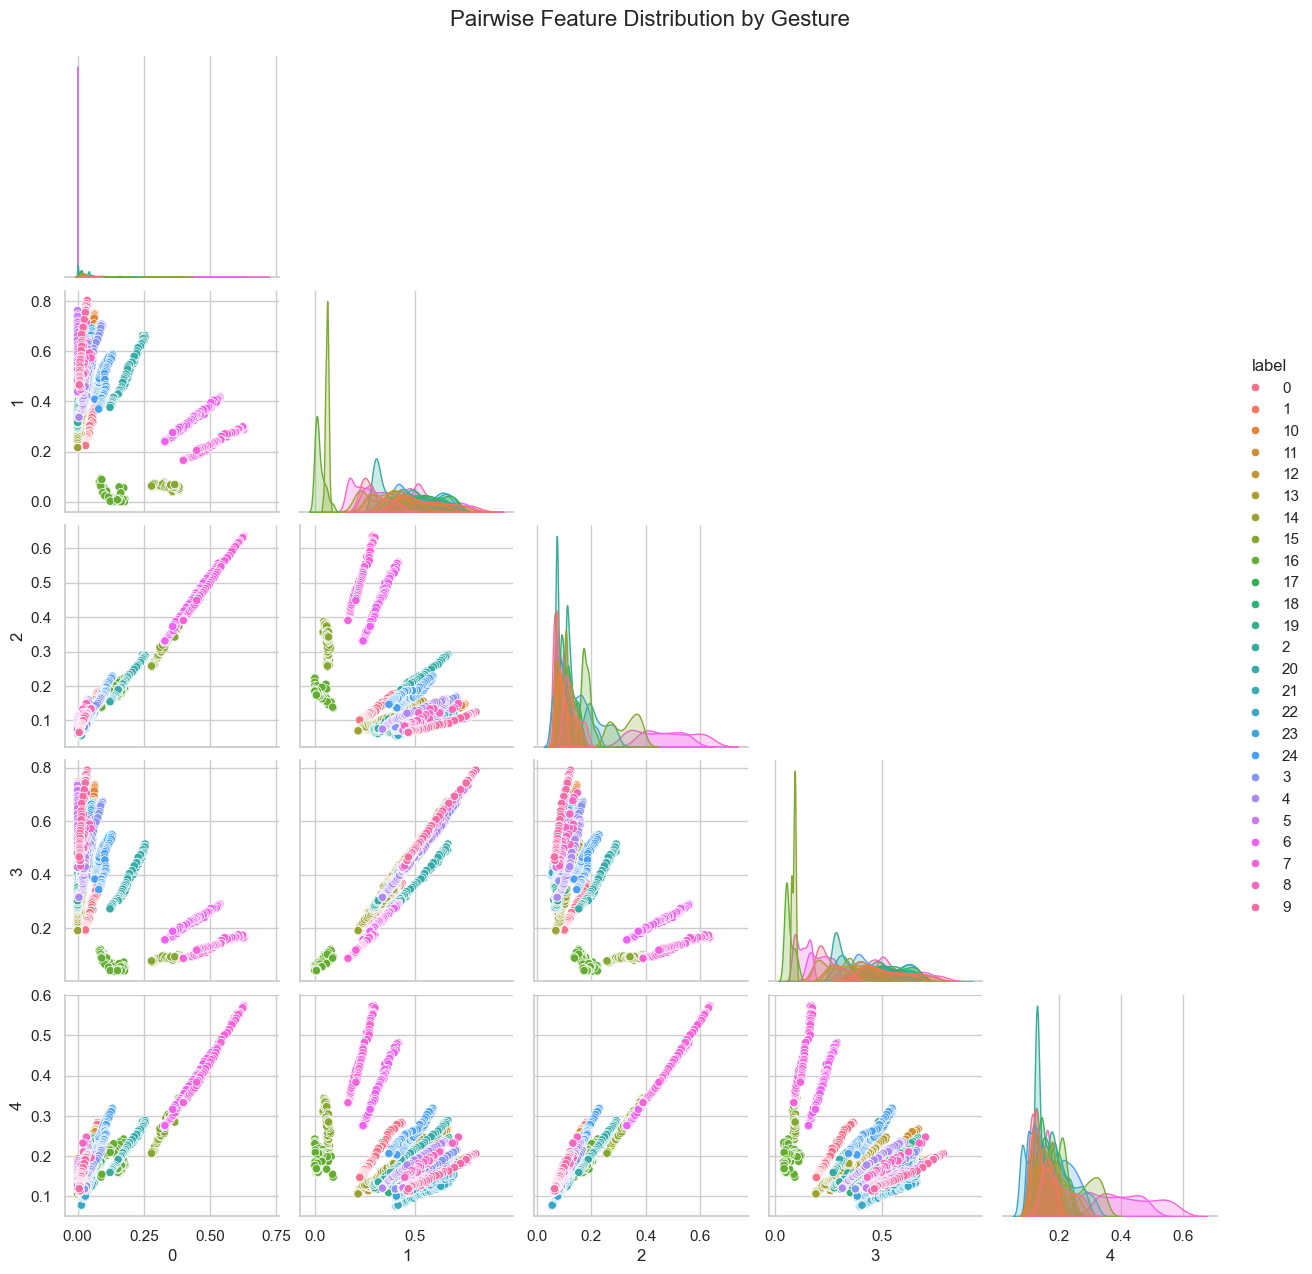

In [25]:
import seaborn as sns

# Sample a subset (e.g. first 5 features) for readability
sampled_df = df[[0, 1, 2, 3, 4, 'label']]
sns.pairplot(sampled_df, hue='label', palette='husl', corner=True)
plt.suptitle("Pairwise Feature Distribution by Gesture", y=1.02, fontsize=16)
plt.show()